# Notebook

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read CSV file

df = pd.read_csv('World Happiness Report.csv')
df.head(5)

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


### Data Cleaning

In [3]:

#Check for missing values
df.isnull().sum()


Country Name                           0
Regional Indicator                   112
Year                                   0
Life Ladder                            0
Log GDP Per Capita                    20
Social Support                        13
Healthy Life Expectancy At Birth      54
Freedom To Make Life Choices          33
Generosity                            73
Perceptions Of Corruption            116
Positive Affect                       24
Negative Affect                       16
Confidence In National Government    361
dtype: int64

In [4]:
#Drop de column 'Confidence in National Goverment. Has to many Null values
df.drop(columns='Confidence In National Government', inplace= True)


In [5]:
# Impute missing values in numeric columns using the mean
numeric_columns = ['Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 
                   'Freedom To Make Life Choices', 'Generosity', 'Perceptions Of Corruption',
                   'Positive Affect', 'Negative Affect']

# Imputing the missing numeric values with the mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


df['Regional Indicator'] = df['Regional Indicator'].fillna('Unknown')

In [6]:
#Check for missing values
df.isnull().sum()

Country Name                        0
Regional Indicator                  0
Year                                0
Life Ladder                         0
Log GDP Per Capita                  0
Social Support                      0
Healthy Life Expectancy At Birth    0
Freedom To Make Life Choices        0
Generosity                          0
Perceptions Of Corruption           0
Positive Affect                     0
Negative Affect                     0
dtype: int64

In [7]:
df.shape

(2199, 12)

In [8]:
df.describe()

,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect
count,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000
mean,2014.161437,5.479226,9.389766,0.810679,63.294583,0.747858,0.000096,0.745195,0.652143,0.271501
std,4.718736,1.125529,1.148128,0.120594,6.815805,0.139094,0.158385,0.180867,0.105342,0.086559
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.257534,-0.337527,0.035198,0.178886,0.082737
25%,2010.000000,4.646750,8.505131,0.747512,59.412500,0.658615,-0.107358,0.697610,0.572742,0.208157
50%,2014.000000,5.432437,9.491772,0.834280,64.879997,0.766945,-0.016512,0.791269,0.661645,0.261508
75%,2018.000000,6.309460,10.366237,0.904607,68.329998,0.857775,0.086938,0.865565,0.736762,0.322382
max,2022.000000,8.018934,11.663788,0.987343,74.474998,0.985178,0.702708,0.983276,0.883586,0.704590


### TOP 15 Happiest countries in 2022

Text(0, 0.5, 'Happiness Score (Life Ladder)')

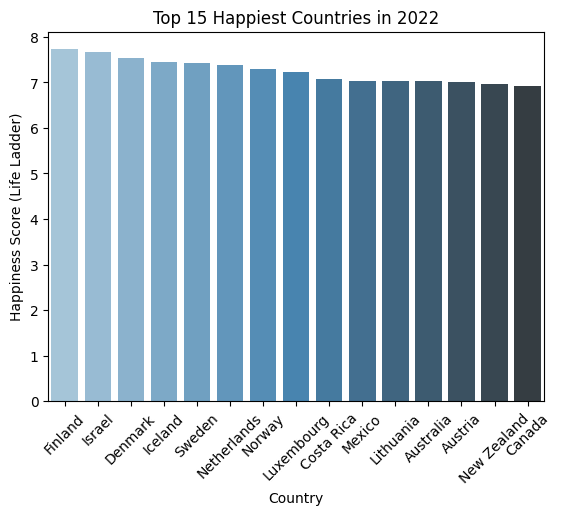

In [9]:
df_2022 = df[df['Year'] == 2022]
happiest_countries = df_2022.sort_values(by='Life Ladder', ascending=False).head(15)
sns.barplot(data=happiest_countries, x='Country Name', y='Life Ladder', hue='Country Name', palette='Blues_d')
plt.xticks(rotation=45)
plt.title('Top 15 Happiest Countries in 2022')
plt.xlabel('Country')
plt.ylabel('Happiness Score (Life Ladder)')

### Happiness (Life Ladder) vs freedom to make life choices

Text(42.12500000000001, 0.5, 'Life Ladder')

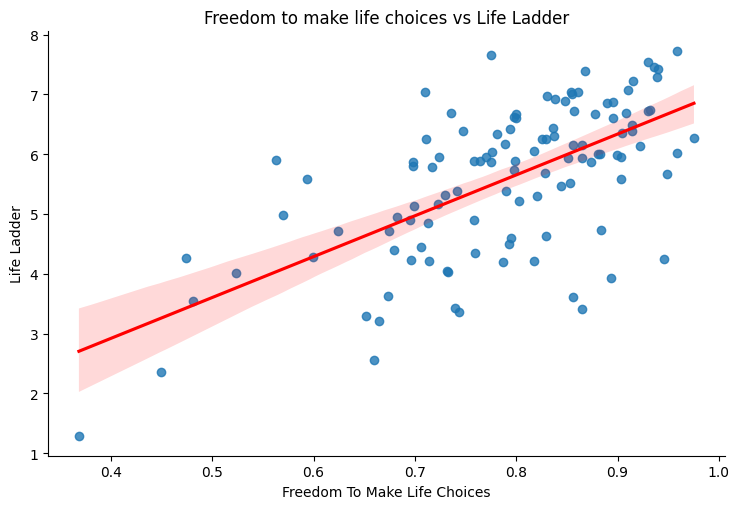

In [10]:
sns.lmplot(data=df_2022, x='Freedom To Make Life Choices',y='Life Ladder', aspect=1.5, line_kws={'color':'red'})
plt.title('Freedom to make life choices vs Life Ladder')
plt.xlabel('Freedom To Make Life Choices')
plt.ylabel('Life Ladder')

In [11]:
df_2022[['Freedom To Make Life Choices', 'Life Ladder']].corr(method='pearson')

,Freedom To Make Life Choices,Life Ladder
Freedom To Make Life Choices,1.000000,0.632982
Life Ladder,0.632982,1.000000


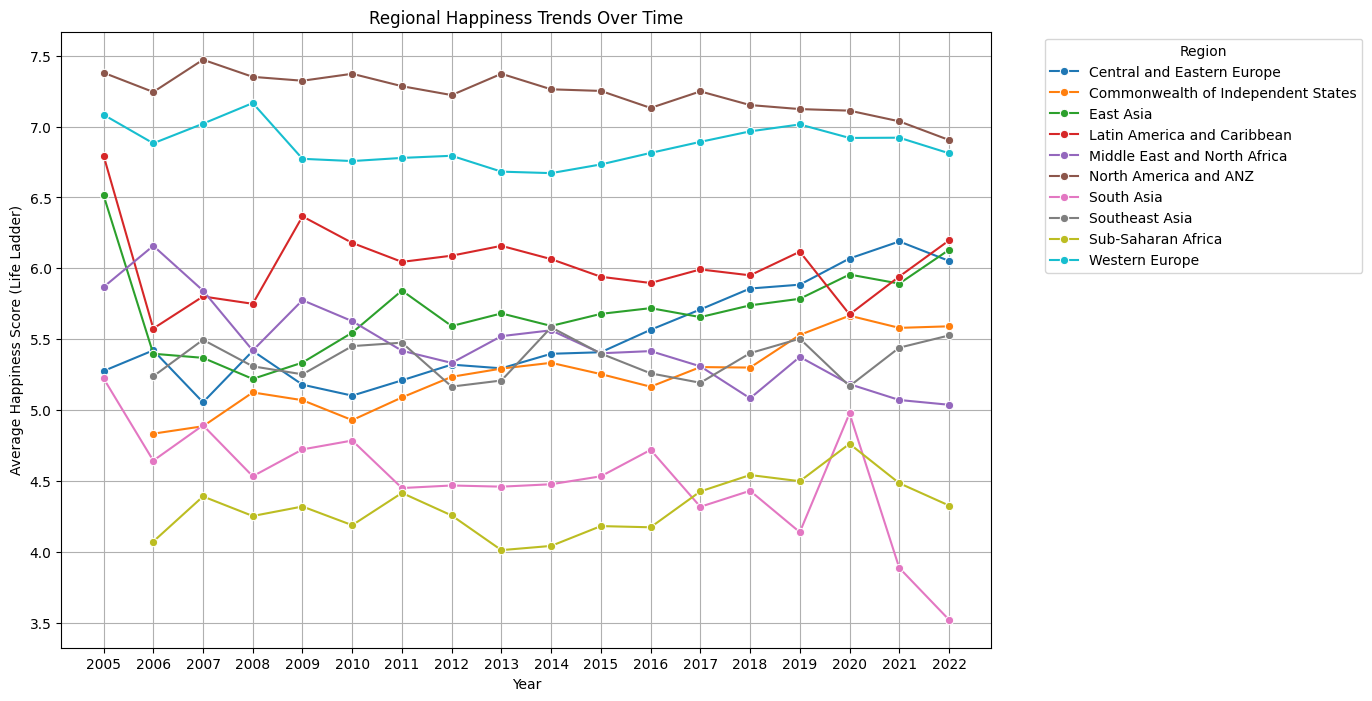

In [12]:
# Filter out rows where Regional Indicator is "Unknown"
df_filtered = df[df['Regional Indicator'] != 'Unknown']

# Group by Regional Indicator and Year to get the mean Life Ladder (happiness score) for each region over time
regional_trends = df_filtered.groupby(['Regional Indicator', 'Year'])['Life Ladder'].mean().reset_index()

# Plot regional happiness trends over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=regional_trends, x='Year', y='Life Ladder', hue='Regional Indicator', marker='o')

# Add title and labels
plt.title('Regional Happiness Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score (Life Ladder)')
plt.xticks(range(regional_trends['Year'].min(), regional_trends['Year'].max()+1))

# Show the plot
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Lets analyse Portugal 

In [13]:
#Filter Portugal data

df_portugal = df[df['Country Name'] == 'Portugal']
df_portugal.head()


,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect
1583,Portugal,Western Europe,2006,5.405246,10.358528,0.905290,68.339996,0.882068,-0.182437,0.880059,0.646715,0.333498
1584,Portugal,Western Europe,2008,5.716967,10.383067,0.885925,68.820000,0.646464,-0.221352,0.932686,0.666880,0.309281
1585,Portugal,Western Europe,2010,5.094526,10.367164,0.863907,69.300003,0.721036,-0.109846,0.947879,0.681019,0.265107
1586,Portugal,Western Europe,2011,5.219998,10.351527,0.855961,69.540001,0.875093,-0.176904,0.961977,0.670633,0.279201
1587,Portugal,Western Europe,2012,4.993962,10.314162,0.866039,69.779999,0.773821,-0.100899,0.959288,0.631480,0.370170


#### GDP vs Happiness in Portugal Over Time

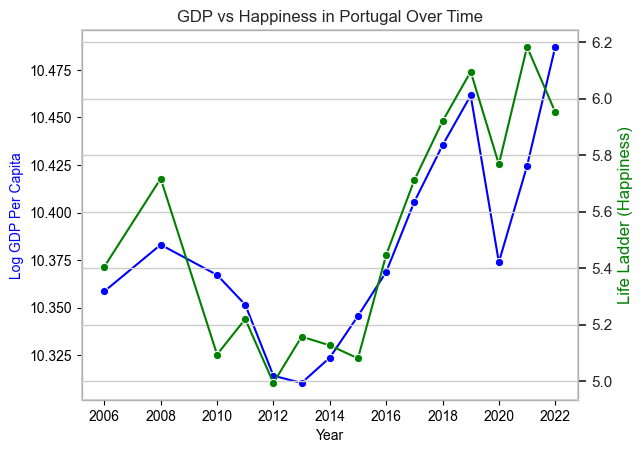

In [14]:
fig, ax1 = plt.subplots()
sns.set(style="whitegrid")
sns.lineplot(data=df_portugal, x='Year', y='Log GDP Per Capita', ax=ax1, marker='o', color='blue')
ax1.set_ylabel('Log GDP Per Capita', color='blue')

# Create a second y-axis for Life Ladder (happiness score)
ax2 = ax1.twinx()
sns.lineplot(data=df_portugal, x='Year', y='Life Ladder', ax=ax2, marker='o', color='green')
ax2.set_ylabel('Life Ladder (Happiness)', color='green')

plt.title('GDP vs Happiness in Portugal Over Time')
plt.show()


#### GDP vs Healthy Life Expectancy At Birth in Portugal Over Time

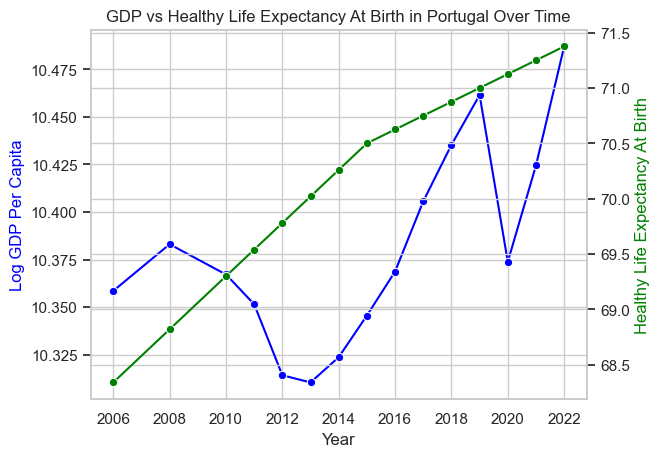

In [15]:
fig, ax1 = plt.subplots()
sns.set(style="whitegrid")
sns.lineplot(data=df_portugal, x='Year', y='Log GDP Per Capita', ax=ax1, marker='o', color='blue')
ax1.set_ylabel('Log GDP Per Capita', color='blue')

# Create a second y-axis for Life Ladder (happiness score)
ax2 = ax1.twinx()
sns.lineplot(data=df_portugal, x='Year', y='Healthy Life Expectancy At Birth', ax=ax2, marker='o', color='green')
ax2.set_ylabel('Healthy Life Expectancy At Birth', color='green')

plt.title('GDP vs Healthy Life Expectancy At Birth in Portugal Over Time')
plt.show()

#### Social Support vs Freedom to Make Life Choices in Portugal

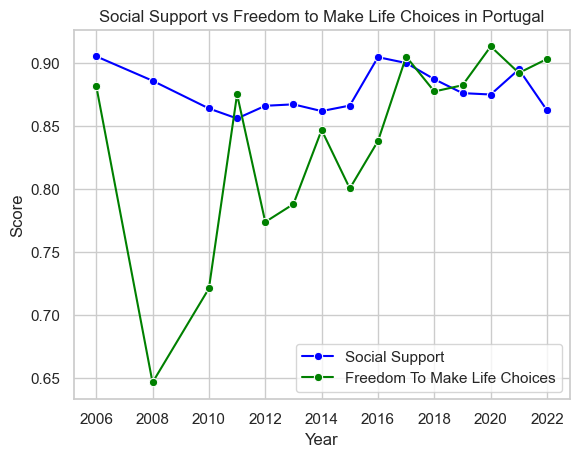

In [16]:
sns.set(style="whitegrid")

# Plot both 'Social Support' and 'Freedom to Make Life Choices' on the same axis
sns.lineplot(data=df_portugal, x='Year', y='Social Support', marker='o', color='blue', label='Social Support')
sns.lineplot(data=df_portugal, x='Year', y='Freedom To Make Life Choices', marker='o', color='green', label='Freedom To Make Life Choices')

# Add labels, title, and legend
plt.title('Social Support vs Freedom to Make Life Choices in Portugal')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend()

# Show the plot
plt.show()

#### Correlation Matrix in Portugal

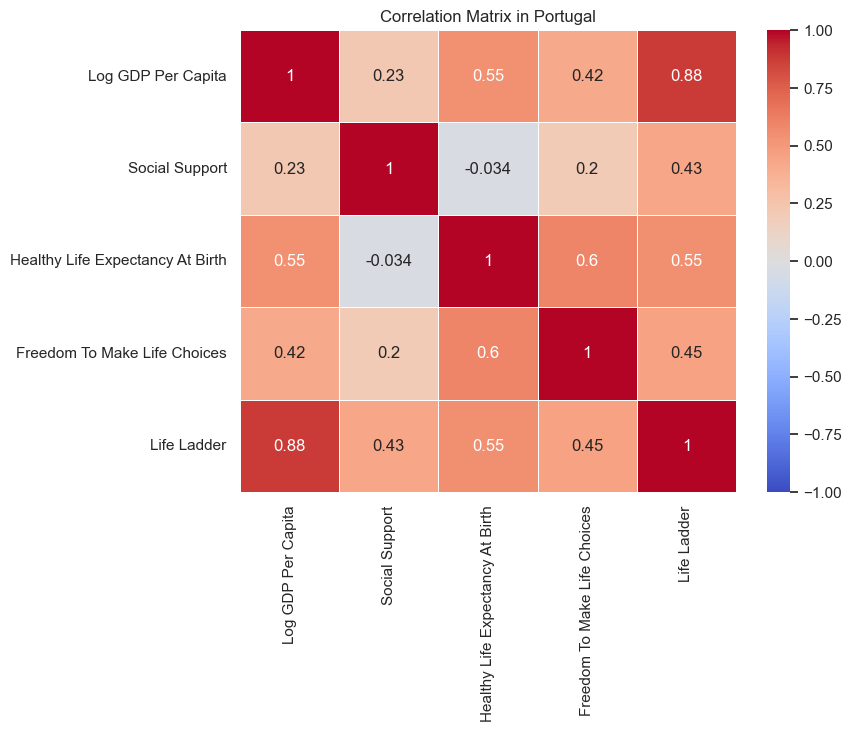

In [17]:
corr_matrix_pt = df_portugal[['Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Life Ladder' ]].corr(method='pearson')

# Set the style for the plot
sns.set(style="whitegrid")

# Plotting a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_pt, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Add title and show the plot
plt.title('Correlation Matrix in Portugal')
plt.show()

### Lets compare Portugal with Germany

In [18]:
df_germany = df[df['Country Name'] == 'Germany']
df_germany.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect
688,Germany,Western Europe,2005,6.619550,10.690792,0.963490,69.900002,0.846624,0.000096,0.781007,0.684765,0.197262
689,Germany,Western Europe,2007,6.416820,10.760041,0.925938,69.940002,0.800878,0.162689,0.792179,0.646915,0.230812
690,Germany,Western Europe,2008,6.521790,10.771496,0.923211,69.959999,0.765557,0.000096,0.758266,0.672131,0.220000
691,Germany,Western Europe,2009,6.641493,10.715405,0.934782,69.980003,0.843785,0.122892,0.689931,0.684359,0.206445
692,Germany,Western Europe,2010,6.724531,10.757887,0.939309,70.000000,0.842656,0.090753,0.688006,0.697530,0.182344


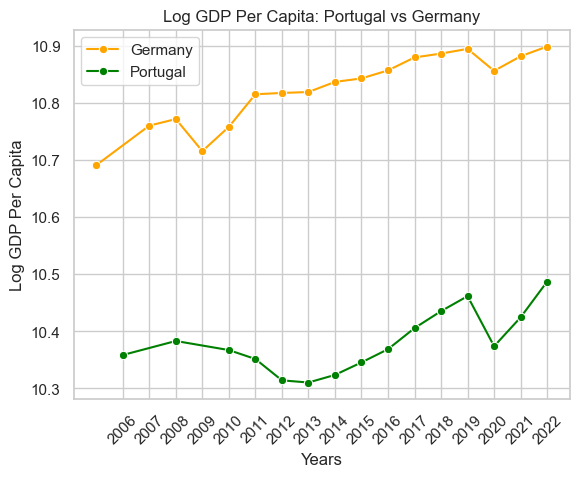

In [19]:

sns.lineplot(data=df_germany, x='Year', y='Log GDP Per Capita', marker='o', color='orange', label='Germany')
sns.lineplot(data=df_portugal, x='Year', y='Log GDP Per Capita', marker='o', color='green', label='Portugal')

plt.xticks(ticks=range(int(df_portugal['Year'].min()), int(df_portugal['Year'].max()) + 1), rotation=45)
plt.xlabel('Years')
plt.ylabel('Log GDP Per Capita')
plt.title('Log GDP Per Capita: Portugal vs Germany')
plt.grid(True)
plt.legend()
plt.show()

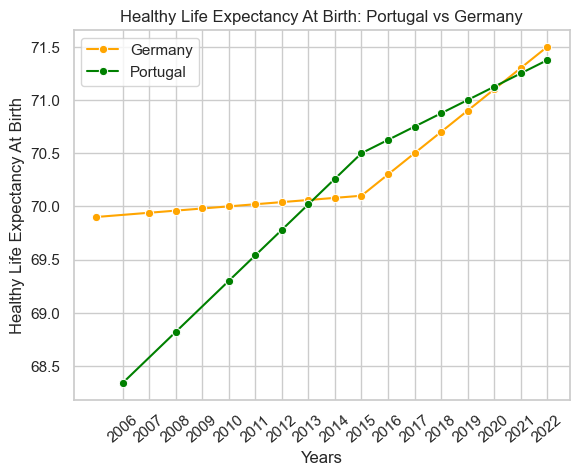

In [20]:
sns.lineplot(data=df_germany, x='Year', y='Healthy Life Expectancy At Birth', marker='o', color='orange', label='Germany')
sns.lineplot(data=df_portugal, x='Year', y='Healthy Life Expectancy At Birth', marker='o', color='green', label='Portugal')

plt.xticks(range(df_portugal['Year'].min(), df_portugal['Year'].max() +1), rotation=40)
plt.title('Healthy Life Expectancy At Birth: Portugal vs Germany')
plt.xlabel('Years')
plt.ylabel('Healthy Life Expectancy At Birth')
plt.grid(True)
plt.legend()
plt.show()